# Previsão e análise da taxa de produto de vendas

## Sobre o conjunto de dados
Esse conjunto de dados é o conjunto de dados da fatura do produto. Incluindo valores de impostos e qtd.
Usando este conjunto de dados, você pode fazer Análise de Dados e Previsão de Taxa de Produto
Você também pode fazer o pré-processamento de dados:

1)Trabalhar no pré-processamento de dados

2)Análise de dados

3)Visualização de dados usando Seaborn

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

In [2]:
base = pd.read_excel(r"DtScience\product cost prediction.xlsx")
display(base)

,productname,uom,qty,rate,amount,taxableamt,cgstrate,cgstamt,sgstrate,sgstamt,total,originalrate
0,671-LT,Nos,14,155.0000,2170.0000,2170.0000,9.0,195.30000,9.0,195.30000,2560.6,155.0000
1,673-HLA,Nos,1,155.0000,155.0000,155.0000,9.0,13.95000,9.0,13.95000,182.9,155.0000
2,GIALLO GRENE,Nos,3,230.0000,690.0000,690.0000,9.0,62.10000,9.0,62.10000,814.2,230.0000
3,CANYON BROWN,Nos,28,475.0000,13300.0000,13300.0000,9.0,1197.00000,9.0,1197.00000,15694.0,475.0000
4,HERIC GRAFITO-LT,Nos,2,255.0000,510.0000,510.0000,9.0,45.90000,9.0,45.90000,601.8,255.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
1127,MAGNA BAINCO-MN1,NOS,1,589.8305,589.8305,589.8305,9.0,53.08475,9.0,53.08475,696.0,696.0000
1128,SIFON BAINCO,NOS,6,617.3729,3704.2370,3704.2370,9.0,333.38130,9.0,333.38130,4371.0,728.5000
1129,HERICAN TUSK,NOS,19,919.4916,17470.3400,17470.3400,9.0,1572.33000,9.0,1572.33000,20615.0,919.4916
1130,MYK TIL;E ADHESIVE 305,NOS,4,254.2372,1016.9490,1016.9490,9.0,91.52540,9.0,91.52540,1200.0,300.0000


nome do produto - Nome do produto

uom- Unidade de Majoração

qty -Quantidade do produto

taxa - Taxa Atual do Produto

valor - Valor subtotal

valor tributável - Valor real tributável

cgstrate- Imposto Central por:
    
    cgstamt- Valor do imposto central

sgstrate - Imposto Estadual por: 

    sgstamt- Valor do imposto estadual

total- Valor Total Total Final

Taxa Original- Taxa Original Real

In [3]:
base.columns 

Index(['productname', 'uom', 'qty', 'rate', 'amount', 'taxableamt', 'cgstrate',
       'cgstamt', 'sgstrate', 'sgstamt', 'total', 'originalrate'],
      dtype='object')

In [4]:
base["uom"].unique()

array(['Nos', 'Box', 'BOX', 'NOS', 'BAG', 2], dtype=object)

In [5]:
base["uom"].nunique()

6

In [6]:
base["uom"].value_counts()

uom
NOS    406
Nos    364
BOX    285
Box     75
BAG      1
2        1
Name: count, dtype: int64

In [7]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132 entries, 0 to 1131
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   productname   1132 non-null   object 
 1   uom           1132 non-null   object 
 2   qty           1132 non-null   int64  
 3   rate          1132 non-null   float64
 4   amount        1132 non-null   float64
 5   taxableamt    1132 non-null   float64
 6   cgstrate      1132 non-null   float64
 7   cgstamt       1132 non-null   float64
 8   sgstrate      1132 non-null   float64
 9   sgstamt       1132 non-null   float64
 10  total         1132 non-null   float64
 11  originalrate  1132 non-null   float64
dtypes: float64(9), int64(1), object(2)
memory usage: 106.2+ KB


In [8]:
base.describe()

,qty,rate,amount,taxableamt,cgstrate,cgstamt,sgstrate,sgstamt,total,originalrate
count,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000
mean,8.898410,842.187548,5658.961670,5406.067598,9.045495,483.558579,9.045495,483.558579,6370.710329,864.544643
std,11.390866,921.384641,7936.479524,7872.115634,0.868399,705.039318,0.868399,705.039318,9260.075430,962.922079
min,1.000000,33.000000,66.000000,66.000000,0.000000,0.000000,0.000000,0.000000,77.880000,33.000000
25%,1.000000,325.000000,1147.880750,920.000000,9.000000,82.750000,9.000000,82.750000,1085.600000,333.750000
50%,5.000000,602.000000,2520.000000,2288.779650,9.000000,205.520350,9.000000,205.520350,2710.460000,605.000000
75%,11.000000,961.250000,6602.542250,6076.250000,9.000000,541.125000,9.000000,541.125000,7180.890000,991.250000
max,109.000000,7625.000000,65861.870000,65861.870000,14.000000,5927.570000,14.000000,5927.570000,77717.010000,7625.000000


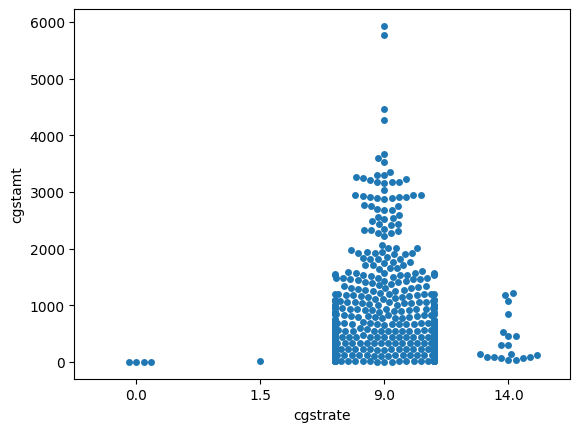

In [9]:
sns.swarmplot(data=base, x="cgstrate", y="cgstamt");

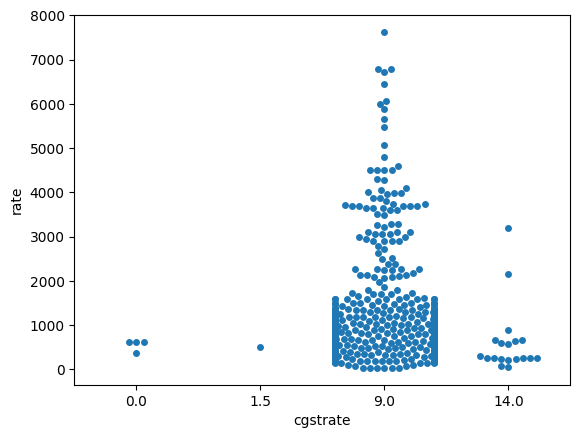

In [10]:
sns.swarmplot(data=base, x="cgstrate", y="rate");

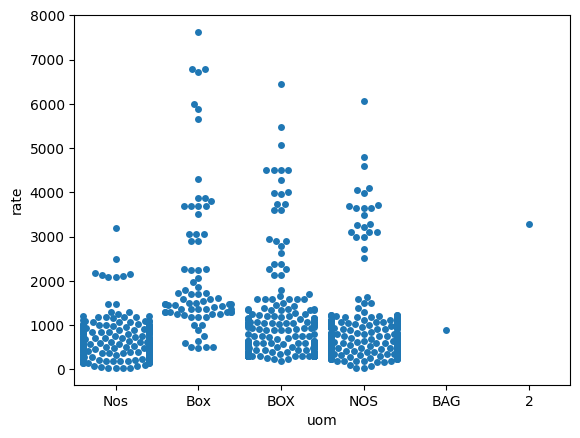

In [11]:
sns.swarmplot(data=base, x="uom", y="rate");